## Circuit creation

In [28]:
L = 6
J = 1
h = 0.05
lamb = 0.5

particle_pair_left_position = 2
particle_pair_length = 1

final_time = 10
layers = 100
measure_every_layers = 1

In [29]:
import z2chain.circs as circs

logical_circs = circs.particle_pair_quench_simulation_circuits(L, J, h, lamb, particle_pair_left_position, particle_pair_length, final_time, layers, measure_every_layers)

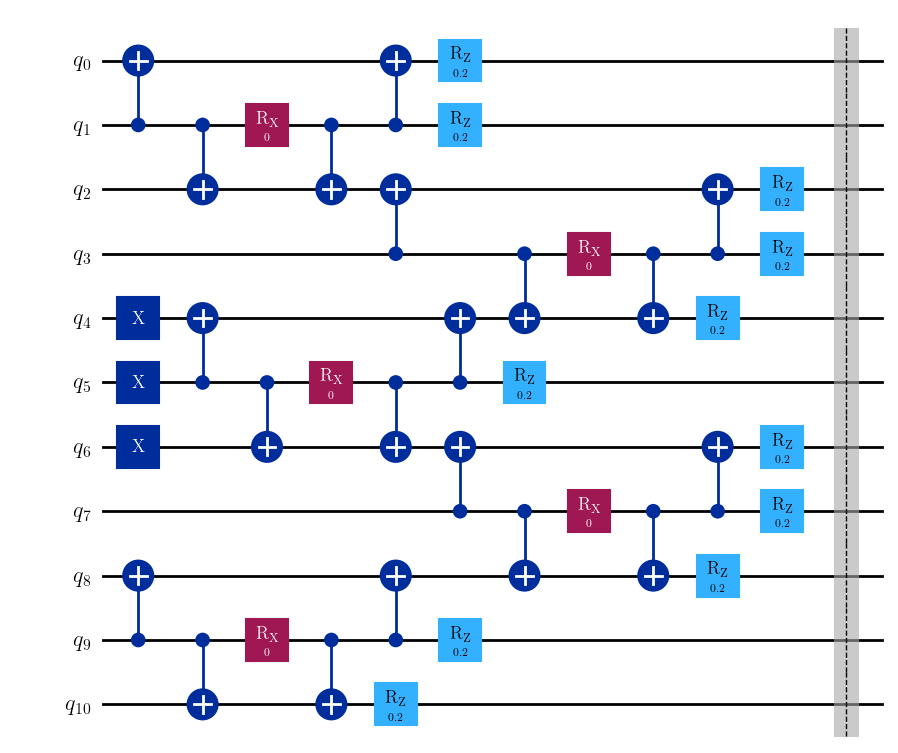

In [ ]:
logical_circs[1].draw(output="mpl")

## Ideal statevector circuit simulation

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

simulator_backend = AerSimulator(method="statevector")
pm = generate_preset_pass_manager(backend=simulator_backend, optimization_level=2)
physical_circs = [pm.run(circ) for circ in logical_circs]

In [ ]:
from utils.hexec import execute_estimator_batch
from z2chain.qiskit_observables import local_pauli_z
from functools import partial

estimator_options = {
    "default_shots": 4096,
    "optimization_level": 1
}

observables_generating_funcs = [partial(local_pauli_z, qubit_ind=i) for i in range(2*L-1)]

jobs = execute_estimator_batch(simulator_backend, estimator_options, physical_circs, observables_generating_funcs)

/opt/homebrew/Caskroom/miniconda/base/envs/qiskit/lib/python3.12/site-packages/qiskit_ibm_runtime/session.py:157: UserWarning: Session is not supported in local testing mode or when using a simulator.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/qiskit/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:243: UserWarning: Options {'transpilation': {'optimization_level': 1}, 'default_shots': 4096} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


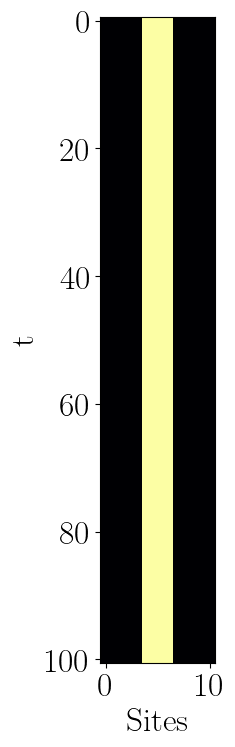

In [ ]:
from z2chain.plotting import x_t_plot_jobs

x_t_plot_jobs(jobs)

NOT CORRECT